In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

: 

In [2]:
df=pd.read_csv("Data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df['gender'].value_counts()   # Take the count with-respect to category 

gender
female    518
male      482
Name: count, dtype: int64

In [4]:
df.isna().sum()   # To check is there any null value

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df[df['math score']==0]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


In [10]:
#A=list(df.select_dtypes(include='O')) # method to take object data type in a list

In [11]:
#A

In [12]:
Num_value=[feature for feature in df.columns if df[feature].dtype!='O']
Cat_value=[feature for feature in df.columns if df[feature].dtype=='O']
#Value=list(df.select_dtypes(include=['O'])) # Method, takes categorical value in a list

In [13]:
print(Num_value)
print(Cat_value)

['math score', 'reading score', 'writing score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [14]:
df['Total_score']=df['math score']+df['reading score']+df['writing score']
df['Avrage_score']=df['Total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Avrage_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
# Below syntax write in this way also
''' full=df[df['math score']==100]
    full['gender'].count() '''

math_fullmark=(df[df['math score']==100]['Avrage_score'].count()) 
reading_fullmark=(df[df['reading score']==100]['Avrage_score'].count())
writing_fullmark=(df[df['writing score']==100]['Avrage_score'].count())

print(f'Number fo student getting full mark in math: {math_fullmark}')
print(f'Number fo student getting full mark in reading: {reading_fullmark}')
print(f'Number fo student getting full mark in writing: {writing_fullmark}')

Number fo student getting full mark in math: 7
Number fo student getting full mark in reading: 17
Number fo student getting full mark in writing: 14


In [16]:
math_fullmark=(df[df['math score']<=20]['Avrage_score'].count())
reading_fullmark=(df[df['reading score']<=20]['Avrage_score'].count())
writing_fullmark=(df[df['writing score']<=20]['Avrage_score'].count())

print(f'Number fo student getting full mark in math: {math_fullmark}')
print(f'Number fo student getting full mark in reading: {reading_fullmark}')
print(f'Number fo student getting full mark in writing: {writing_fullmark}')

Number fo student getting full mark in math: 4
Number fo student getting full mark in reading: 1
Number fo student getting full mark in writing: 3


<Axes: xlabel='Avrage_score', ylabel='Count'>

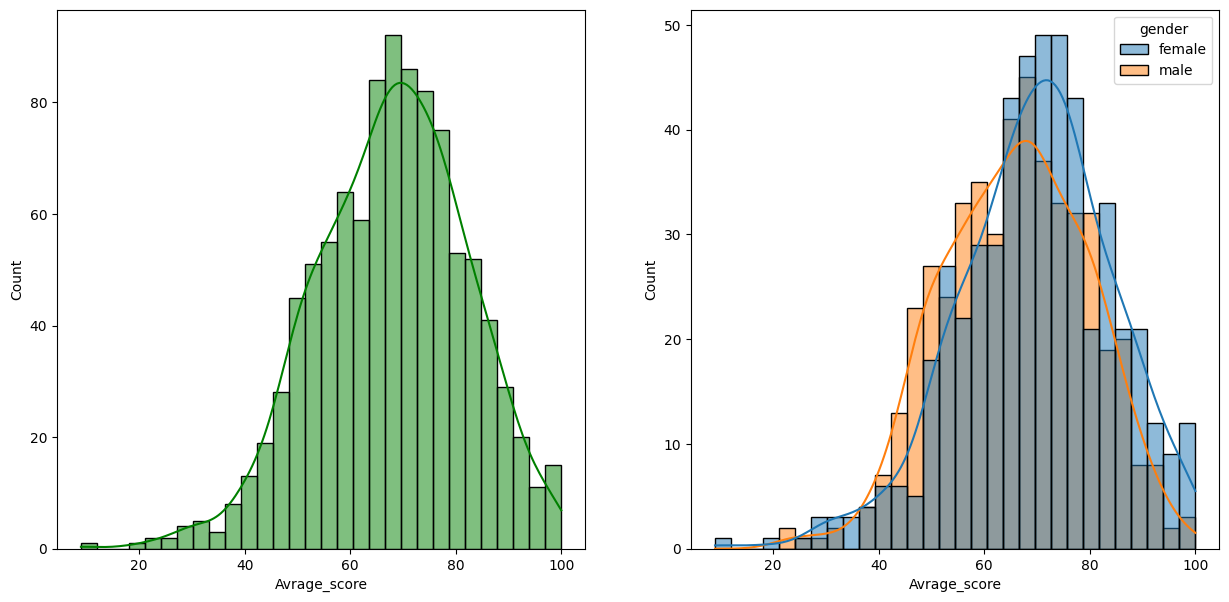

In [17]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Avrage_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Avrage_score',bins=30,hue='gender',kde=True)

<Axes: xlabel='Total_score', ylabel='Count'>

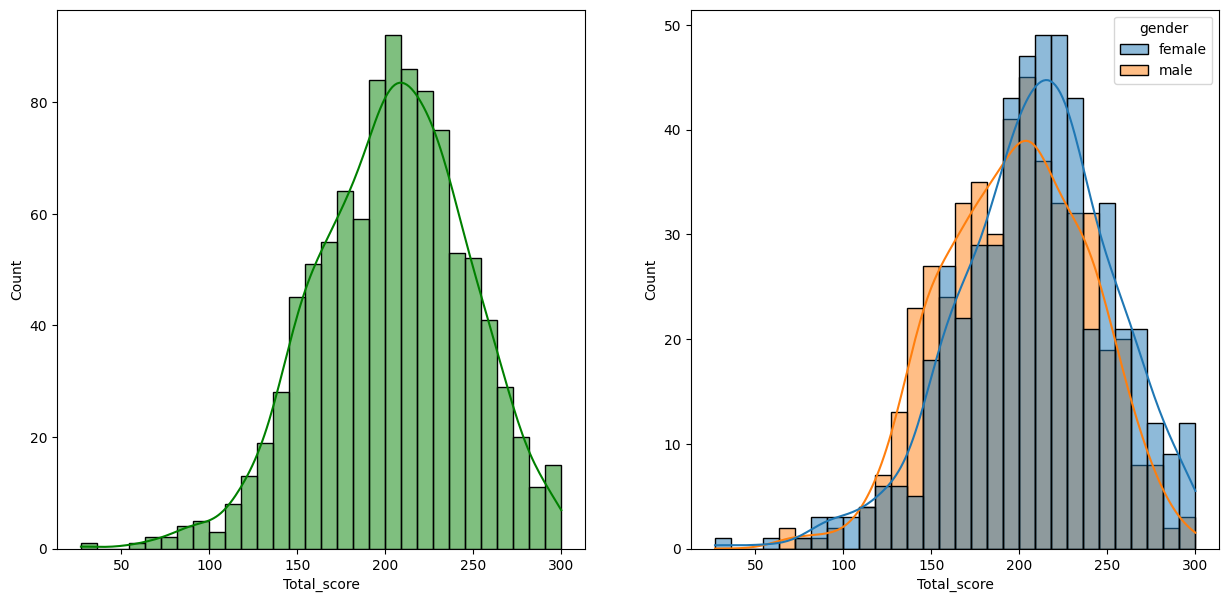

In [18]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_score',bins=30,hue='gender',kde=True)

In [19]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total_score', 'Avrage_score'],
      dtype='object')

In [20]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

<Axes: xlabel='Avrage_score', ylabel='Count'>

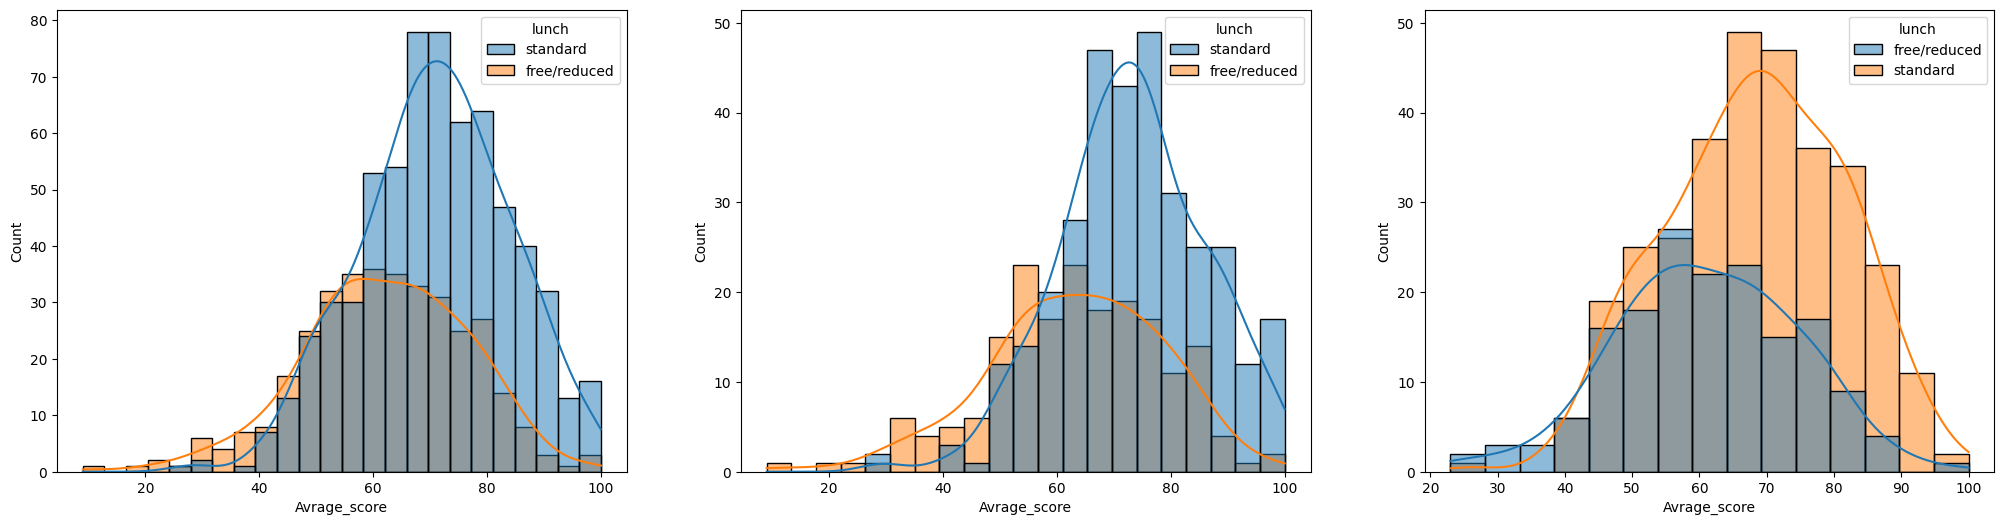

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Avrage_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='Avrage_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='Avrage_score',kde=True,hue='lunch')

* In above hist digrame we see in all three, standard lunce preform well in exam. 

<Axes: xlabel='Avrage_score', ylabel='Count'>

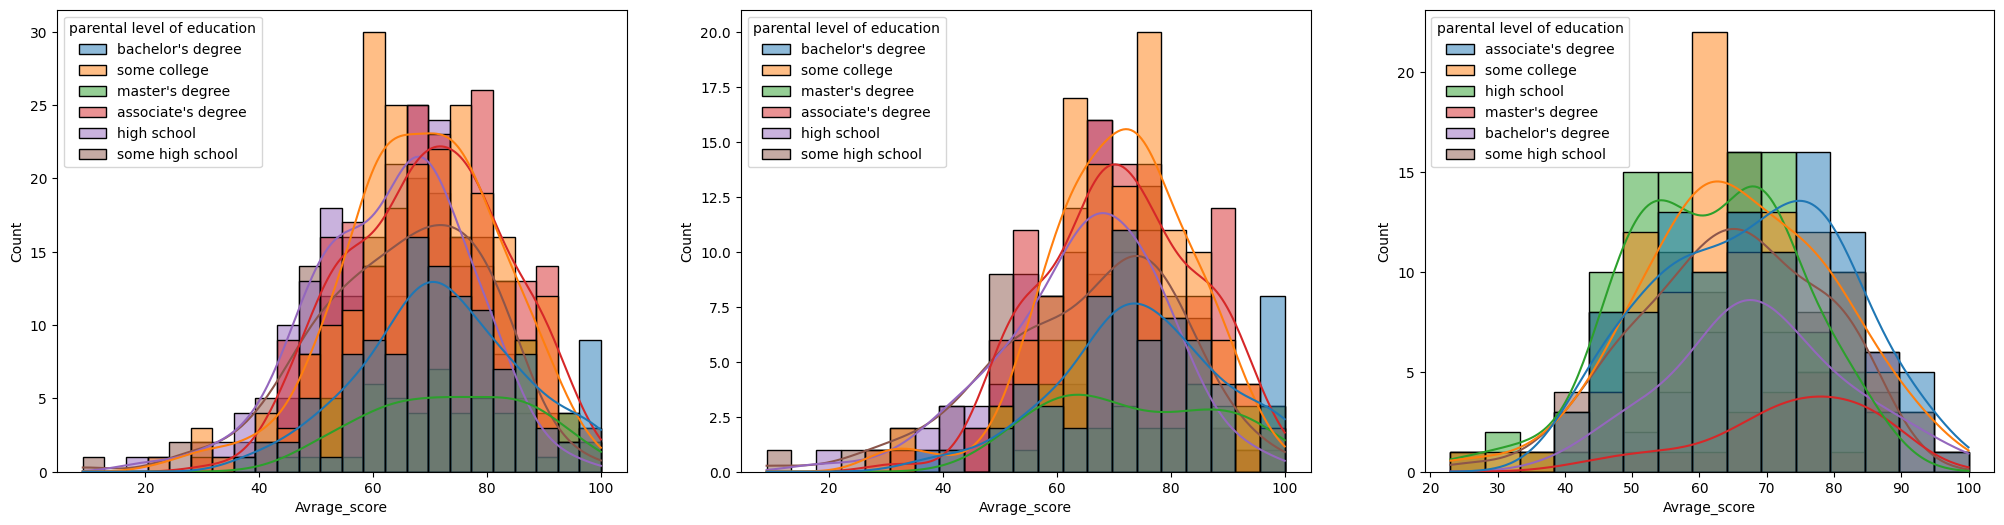

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Avrage_score',kde=True,hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='Avrage_score',kde=True,hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='Avrage_score',kde=True,hue='parental level of education')

* From 1st hist graph ther is no much difference we see that education affect on the students score.
* Same as 1st, 2nd female graph also not seems much difference.
* But in male exam score affect from parents education.

In [23]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

<Axes: xlabel='Avrage_score', ylabel='Count'>

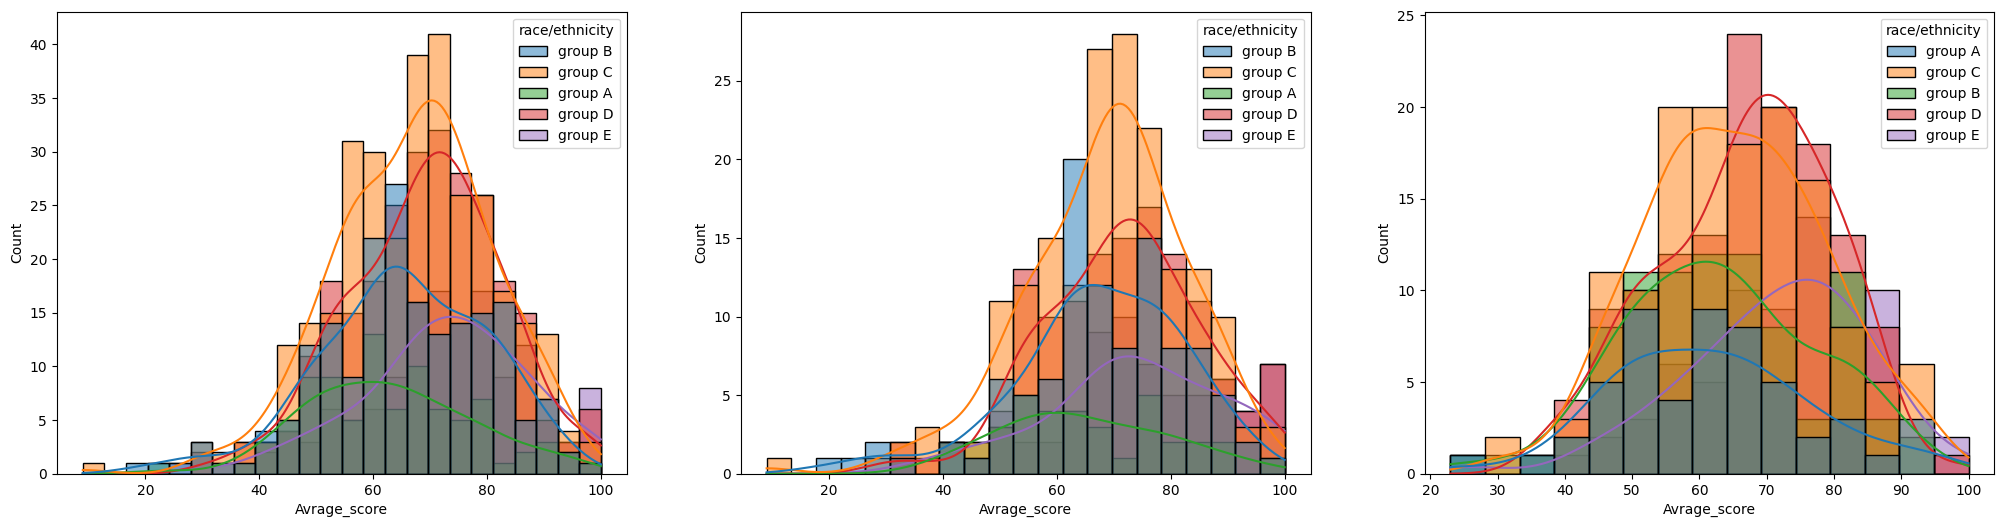

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Avrage_score',kde=True,hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Avrage_score',kde=True,hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Avrage_score',kde=True,hue='race/ethnicity')

* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

<Axes: title={'center': 'Writing socre'}, ylabel='writing score'>

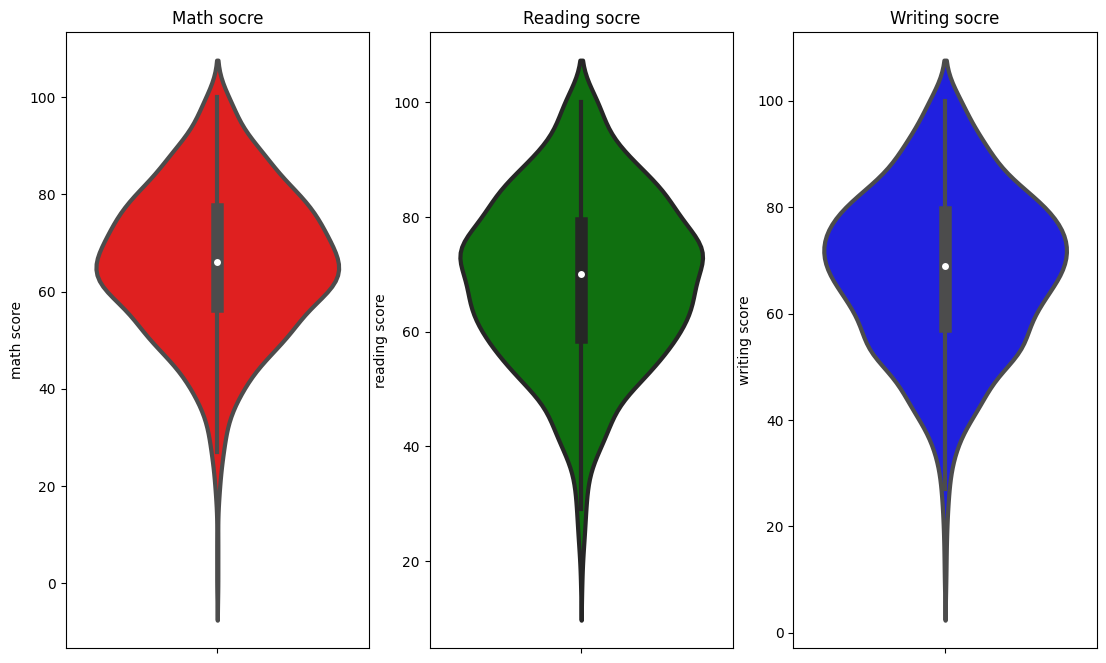

In [25]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("Math socre")
sns.violinplot(y='math score',data=df,color='r',linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading socre')
sns.violinplot(y='reading score',data=df,color='g',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing socre')
sns.violinplot(y='writing score',data=df,color='b',linewidth=3)

* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

# Multivariate analysis using pieplot

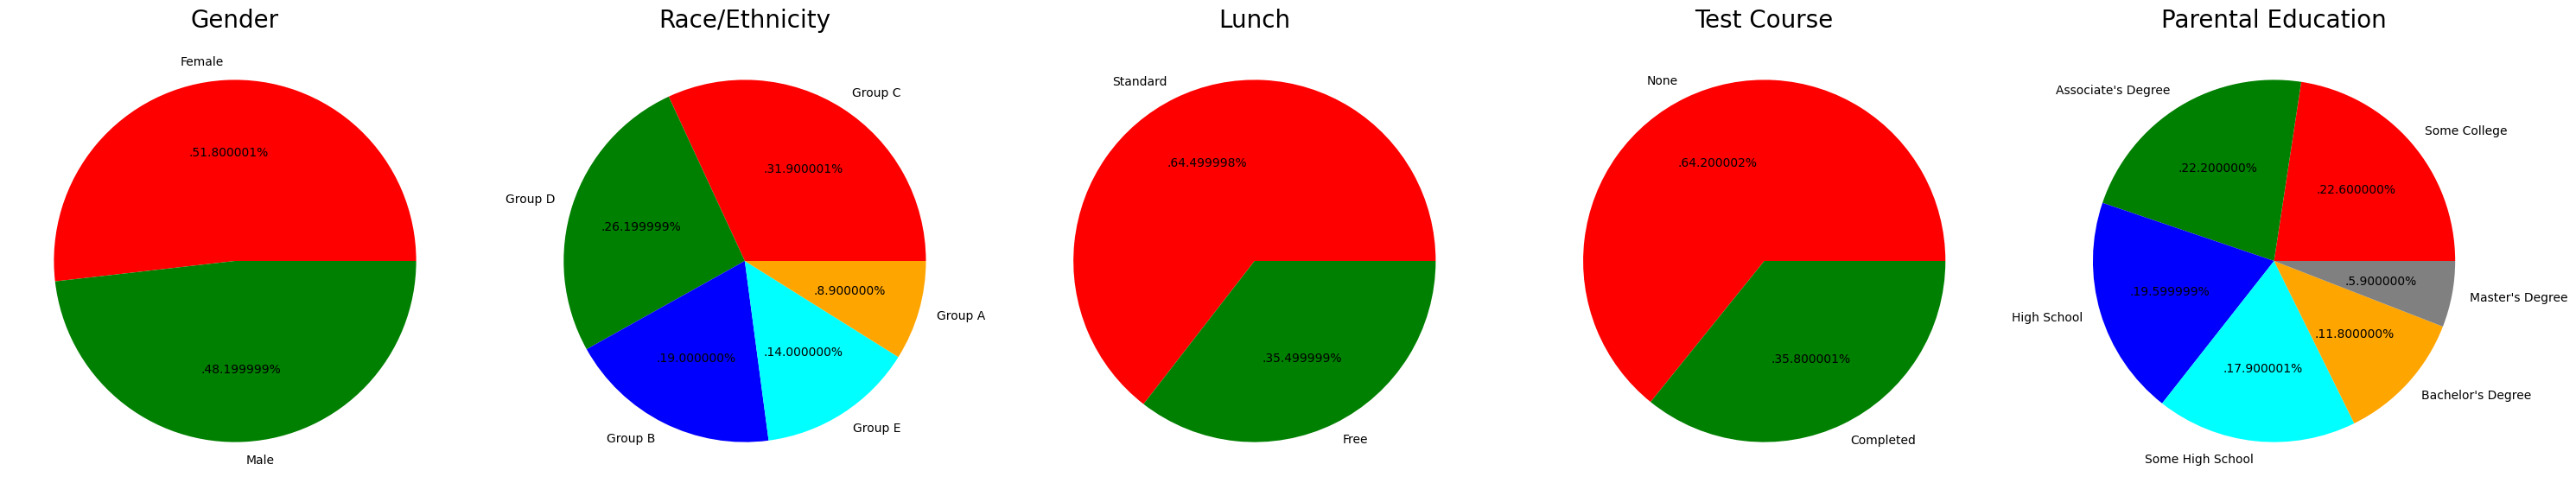

In [26]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

# UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

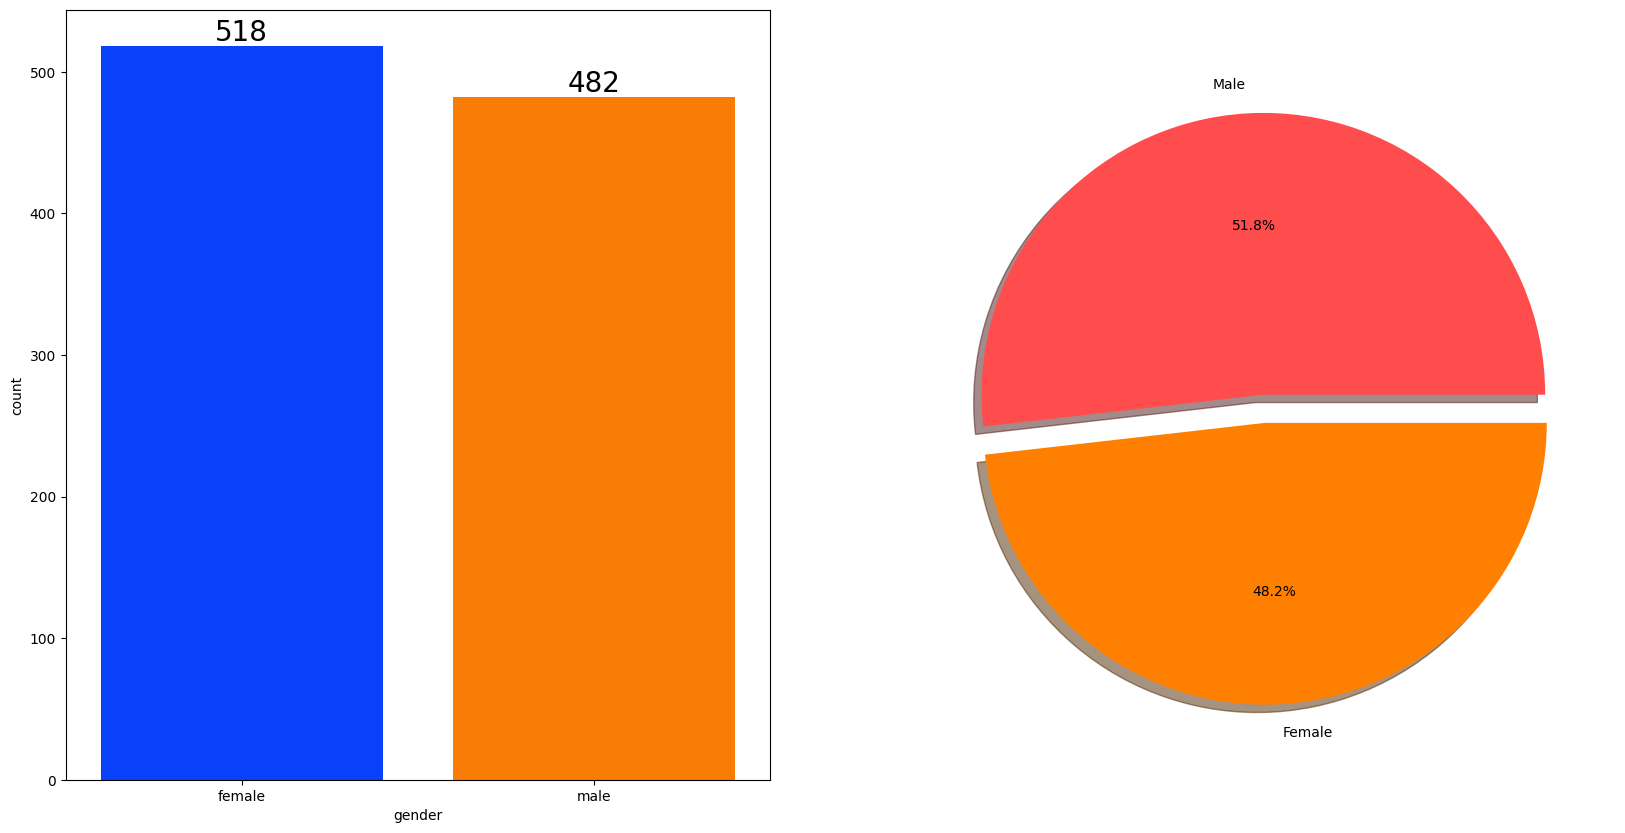

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

# BIVARIATE ANALYSIS (Is gender has any impact on student's performance ? )

In [28]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total_score', 'Avrage_score'],
      dtype='object')

In [38]:
gender_group = df.groupby('gender')['Avrage_score'].mean()
gender_group

gender
female    69.569498
male      65.837483
Name: Avrage_score, dtype: float64

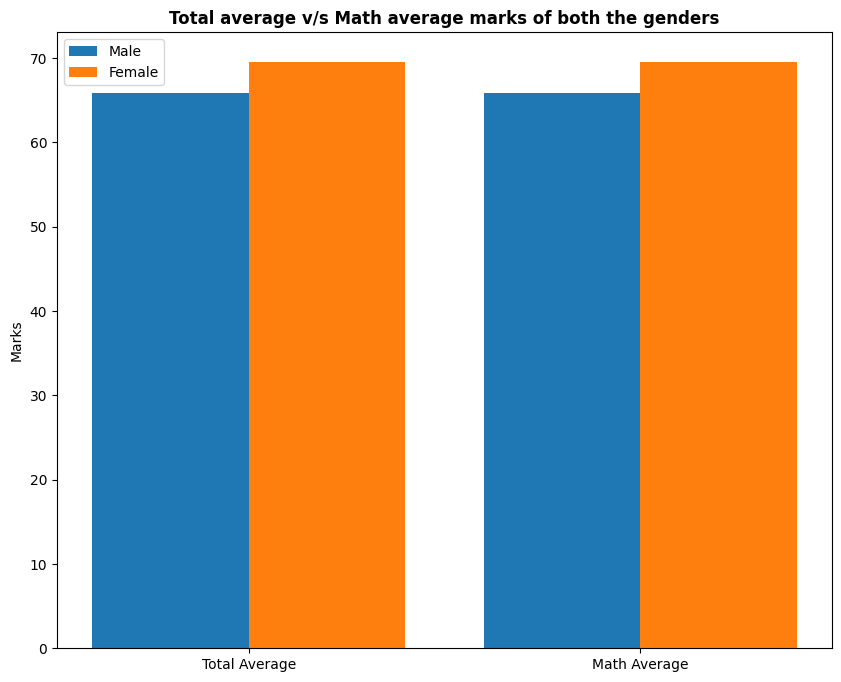

In [39]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


# female_scores = [gender_group['average'][0], gender_group['math score'][0]]
# male_scores = [gender_group['average'][1], gender_group['math score'][1]]

female_scores=gender_group[0]
male_scores=gender_group[1]
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()